<a href="https://colab.research.google.com/github/harmlessprince/fast-ai-course/blob/main/isapple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install -Uqq fastai ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 43.7 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *
from ddgs import DDGS

In [ ]:
def search_images(term, max_images=50):
    with DDGS() as ddgs:
        return [r["image"] for r in ddgs.images(term, max_results=max_images)]

In [ ]:
apple_images = search_images("apple fruit", max_images=50)
orange_images = search_images("orange fruit", max_images=50)
banana_images = search_images("banana fruit", max_images=50)
apple_images[0]

'https://healthjade.com/wp-content/uploads/2017/10/apple-fruit.jpg'

In [ ]:
from fastdownload import download_url

path = Path('fruits')
path.mkdir(exist_ok=True)

for label, images in [("apple", apple_images), ("orange", orange_images), ("banana", banana_images)]:
    dest = path/label
    dest.mkdir(exist_ok=True)
    for url in images:
        try:
            download_url(url, dest/Path(url).name, show_progress=False)
        except Exception as e:
            print(f"Failed to download {url}: {e}")

Failed to download https://get.pxhere.com/photo/plant-fruit-orange-food-produce-juicy-juice-fruits-tangerine-calabaza-clementine-vegetarian-food-vitamins-oranges-sliced-citrus-flowering-plant-citrus-fruit-bitter-orange-mandarin-orange-land-plant-sweet-lemon-tangelo-valencia-orange-navel-oranges-bahia-orange-citrus-sinensis-1343906.jpg: [Errno 36] File name too long: 'fruits/orange/plant-fruit-orange-food-produce-juicy-juice-fruits-tangerine-calabaza-clementine-vegetarian-food-vitamins-oranges-sliced-citrus-flowering-plant-citrus-fruit-bitter-orange-mandarin-orange-land-plant-sweet-lemon-tangelo-valencia-orange-navel-oranges-bahia-orange-citrus-sinensis-1343906.jpg'
Failed to download https://www.quanta.org/orange/orange.jpg: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1010)>
Failed to download https://rare-gallery.com/uploads/posts/784001-Orange-fruit-Fruit-Two-Orange.jpg: HTTP Error 403: Forbidden
====Error 

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


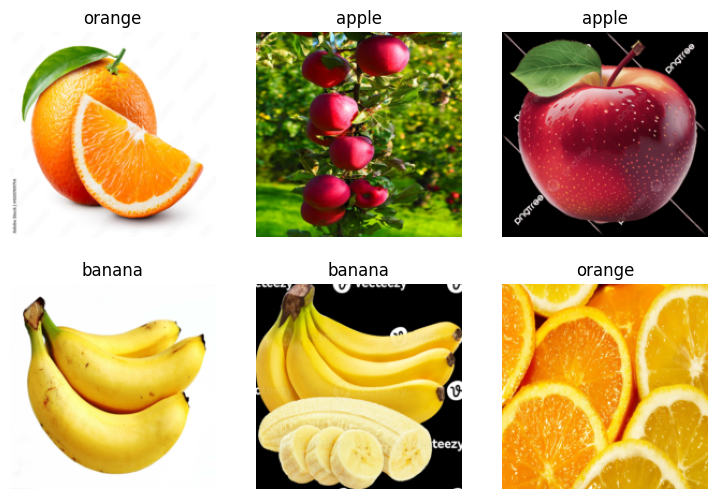

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 94.6MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.746416,0.671655,0.333333,00:15


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.618721,0.124973,0.000000,00:08
1,0.355891,0.054353,0.000000,00:09
2,0.239275,0.066956,0.000000,00:08


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
img = PILImage.create('/content/fruits/orange/wp2293578.jpg')
pred_class, pred_idx, probs = learn.predict(img)
print(f"Prediction: {pred_class}; Probability: {probs[pred_idx]:.4f}")


Prediction: orange; Probability: 0.9988
